# 13.3 US Baby Names 1880–2010

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Tải và hợp nhất dữ liệu

In [2]:
# 1. Tạo một danh sách rỗng để chứa các DataFrame của từng năm
pieces = []
# 2. Vòng lặp qua các năm từ 1880 đến 2010
for year in range(1880, 2011):    
    # 3. Tạo đường dẫn đến tệp của năm đó
    path = f"data/yob{year}.txt"     
    # 4. Đọc tệp CSV, đặt tên cột là ["name", "sex", "births"]
    frame = pd.read_csv(path, names=["name", "sex", "births"])    
    # 5. Thêm cột 'year' để biết dữ liệu này thuộc năm nào
    frame["year"] = year    
    # 6. Thêm DataFrame của năm này vào danh sách
    pieces.append(frame)
# 7. Ghép tất cả các DataFrame trong danh sách 'pieces' thành một DataFrame lớn
names = pd.concat(pieces, ignore_index=True)
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [9]:
names.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

#### Thêm cột tỉ lệ (prop)

In [11]:
names = names.reset_index(drop=True)
# 1. Định nghĩa hàm để thêm cột 'prop'
def add_prop(group):
    # Tính toán cột 'prop'
    group["prop"] = group["births"] / group["births"].sum()
    return group

# 2. Áp dụng hàm này cho mỗi nhóm (năm, giới tính)
names = names.groupby(["year", "sex"]).apply(add_prop)
names.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15476\3672362866.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"]).apply(add_prop)


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

## Phân tích mô tả 

### Số lượng trẻ sinh theo giới tính thay đổi như thế nào từ 1880–2010?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15476\2908774640.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table("births", index="year",


Bảng tổng hợp tổng số ca sinh (5 năm cuối):
sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382


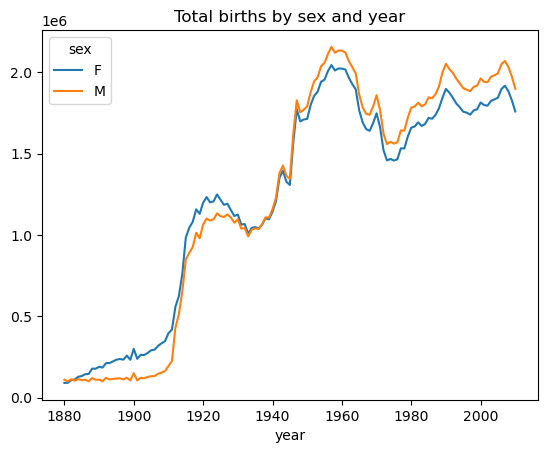

In [ ]:
names = names.reset_index(drop=True)
# 1. Tạo pivot table tính tổng số ca sinh theo năm và giới tính
total_births = names.pivot_table("births", index="year",
                                columns="sex", aggfunc=sum)

# 2. Xem 5 dòng cuối của bảng (để kiểm tra)
print("Bảng tổng hợp tổng số ca sinh (5 năm cuối):")
print(total_births.tail())

# 3. Vẽ biểu đồ đường
# Biểu đồ này sẽ giống Hình 13-4 trong tài liệu
total_births.plot(title="Total births by sex and year")

plt.show() # Hiển thị biểu đồ

### Tên nào phổ biến nhất mỗi thập kỷ (top 10 theo năm hoặc giới)?

In [23]:
# 1. Tạo cột 'decade' (thập kỷ)
names["decade"] = (names["year"] // 10) * 10

# 2. Nhóm theo thập kỷ, giới tính, tên VÀ tính tổng 'births'.
decade_summary_df = names.groupby(["decade", "sex", "name"])["births"].sum().reset_index()

# 3. Lấy top 10 tên cho mỗi nhóm (thập kỷ, giới tính)
top10_decade = (decade_summary_df
                .groupby(["decade", "sex"], group_keys=False)
                .apply(lambda x: x.nlargest(10, "births")))

# 4. In kết quả cho một vài thập kỷ
top10 = top10_decade[top10_decade["decade"].isin([1880])]
top10

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15476\1430604675.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, "births")))


,decade,sex,name,births
1374,1880,F,Mary,91672
122,1880,F,Anna,38159
645,1880,F,Emma,25404
599,1880,F,Elizabeth,25007
1331,1880,F,Margaret,21800
1445,1880,F,Minnie,21724
910,1880,F,Ida,18283
240,1880,F,Bertha,18263
377,1880,F,Clara,17717
55,1880,F,Alice,17141


### Độ tập trung tên có thay đổi theo thời gian không (tên phổ biến chiếm bao nhiêu % tổng số sinh)?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15476\806835693.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15476\806835693.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table_prop = top1000.pivot_table("prop", index="year",


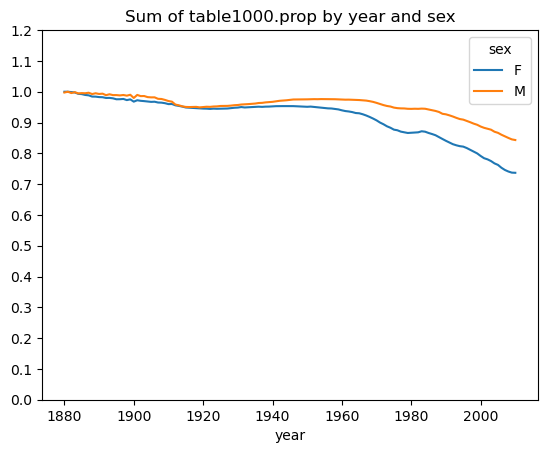

In [24]:
# 1. Định nghĩa một hàm để lấy 1000 tên hàng đầu (sắp xếp theo 'births')
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

# 2. Nhóm 'names' theo 'year' và 'sex', sau đó áp dụng hàm trên
grouped = names.groupby(["year", "sex"], group_keys=False)
top1000 = grouped.apply(get_top1000)

# 3. Tạo bảng tổng hợp, tính TỔNG cột "prop" theo 'year' và 'sex'
table_prop = top1000.pivot_table("prop", index="year",
                                columns="sex",
                                aggfunc=sum)

# 4. Vẽ biểu đồ 
table_prop.plot(title="Sum of table1000.prop by year and sex",
                yticks=np.linspace(0, 1.2, 13))
plt.show()

## Phân tích khám phá

### Xu hướng đa dạng hóa tên (name diversity) có tăng theo thời gian không?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15476\1088473622.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


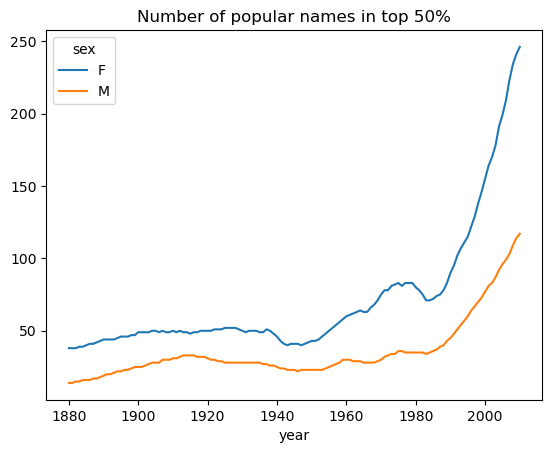

In [25]:
# 1. Định nghĩa hàm
def get_quantile_count(group, q=0.5):
    # Sắp xếp 'prop' giảm dần
    group = group.sort_values("prop", ascending=False)
    
    # Tính tổng tích lũy, tìm vị trí của q (0.5) và + 1
    # vì index mảng bắt đầu từ 0
    return group.prop.cumsum().searchsorted(q) + 1

# 2. Áp dụng hàm này cho mỗi nhóm (năm, giới tính) trên top1000
diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)

# 3. Tái cấu trúc (unstack) để 'sex' (giới tính) trở thành các cột
diversity = diversity.unstack()

# 4. Vẽ biểu đồ (Giống Hình 13-7)
diversity.plot(title="Number of popular names in top 50%")
plt.show()

### Tên “trung tính” (ví dụ Jordan, Taylor) có tăng lên không?

Các tên được phân tích (Lesley-like):
['Leslie' 'Lesley' 'Leslee' 'Lesli' 'Lesly']


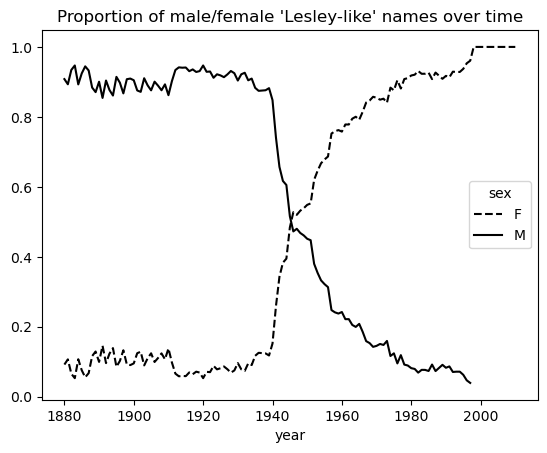

In [27]:
# 1. Lấy tất cả các tên duy nhất từ top1000
# (Nếu bạn chưa tạo 'top1000', hãy chạy lại Cell 4 trước)
all_names = pd.Series(top1000["name"].unique())

# 2. Tìm các tên có chứa "Lesl"
lesley_like = all_names[all_names.str.contains("Lesl")]

print("Các tên được phân tích (Lesley-like):")
print(lesley_like.values)

# 3. Lọc DataFrame top1000 chỉ chứa các tên này
filtered = top1000[top1000["name"].isin(lesley_like)]

# 4. Tạo bảng tổng hợp, tính tổng 'births' theo 'year' và 'sex'
table_lesley = filtered.pivot_table("births", index="year",
                                  columns="sex", aggfunc="sum")

# 5. Chuẩn hóa bảng (Normalize) để xem tỷ lệ Nam/Nữ
#    .sum(axis=1) tính tổng của hàng (Nam + Nữ)
#    .div(...) chia số Nam/Nữ cho tổng đó
table_lesley_prop = table_lesley.div(table_lesley.sum(axis=1), axis=0)

# 6. Vẽ biểu đồ (Giống Hình 13-10)
#    'k-' là đường liền màu đen, 'k--' là đường đứt nét màu đen
table_lesley_prop.plot(style={"M": "k-", "F": "k--"},
                       title="Proportion of male/female 'Lesley-like' names over time")
plt.show()

## Phân tích so sánh

### Những tên xuất hiện ngắn hạn (short-lived) khác gì so với tên phổ biến lâu dài (long-lived)?


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15476\917337424.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births_top1000 = top1000.pivot_table("births", index="year",


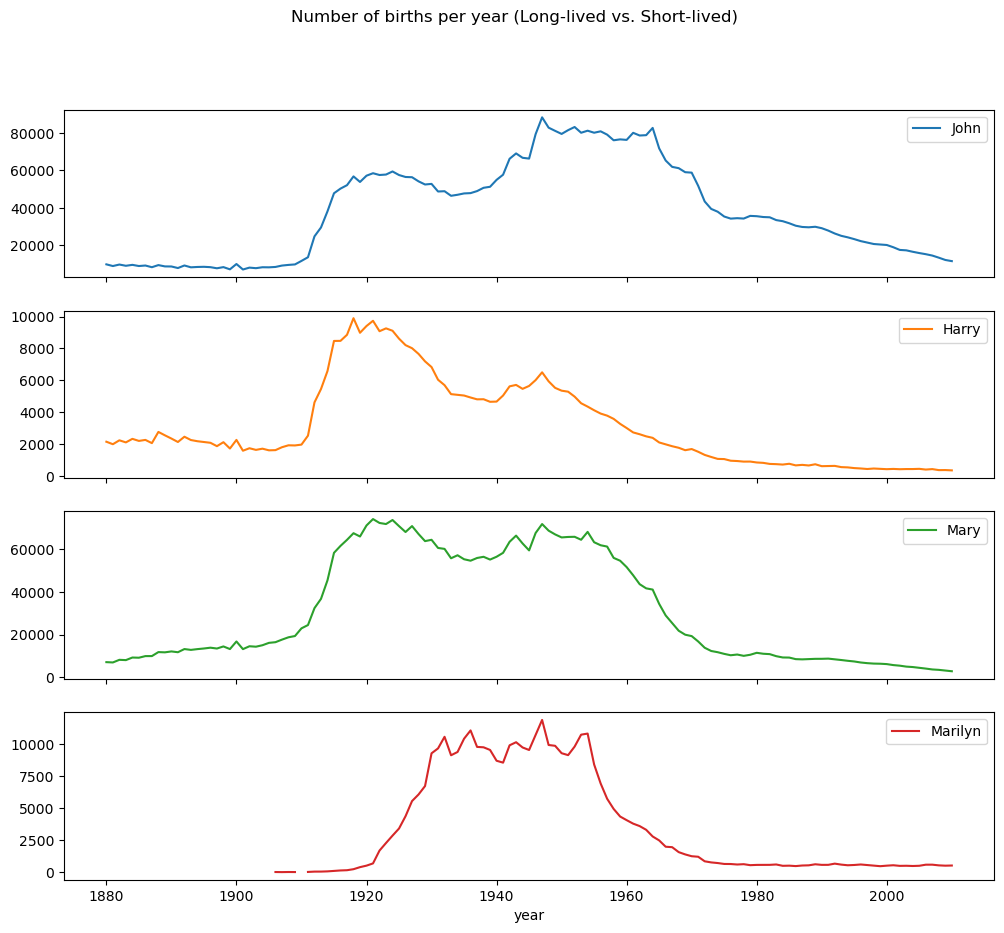

In [ ]:
# 1. Tạo bảng tổng hợp từ 'top1000'
total_births_top1000 = top1000.pivot_table("births", index="year",
                                        columns="name",
                                        aggfunc=sum)

# 2. Tạo một DataFrame con chỉ chứa các tên ví dụ
# John, Mary (long-lived) vs. Marilyn (short-lived)
subset = total_births_top1000[["John", "Harry", "Mary", "Marilyn"]]

# 3. Vẽ biểu đồ (subplots=True sẽ vẽ mỗi tên trên một biểu đồ riêng)
subset.plot(subplots=True, figsize=(12, 10), 
            title="Number of births per year (Long-lived vs. Short-lived)")
plt.show()

## Phân tích dự đoán

### Phân tích Xu hướng 20 năm (1991-2010)

In [29]:
# 1. Lấy dữ liệu 1991 VÀ TÍNH TỔNG cho mỗi tên (cộng M và F)
births_1991 = names[names["year"] == 1991].groupby("name")["births"].sum()

# 2. Lấy dữ liệu 2010 VÀ TÍNH TỔNG cho mỗi tên
births_2010 = names[names["year"] == 2010].groupby("name")["births"].sum()

# 3. Kết hợp chúng thành một DataFrame
#    Bây giờ chỉ mục 'name' đã là duy nhất nên concat sẽ hoạt động
change_df = pd.concat([births_1991, births_2010], axis=1, keys=['1991', '2010']).fillna(0)

# 4. Tính toán chênh lệch (tăng/giảm)
change_df["change"] = change_df["2010"] - change_df["1991"]

# 5. Lọc ra những tên có ý nghĩa
#    (ví dụ: ít nhất 100 ca sinh trong một trong hai năm)
change_df = change_df[ (change_df["1991"] > 100) | (change_df["2010"] > 100) ]

# 6. Sắp xếp để xem các tên TĂNG MẠNH NHẤT ("quay lại")
print("\n--- Top 10 Tên Tăng mạnh nhất (1991-2010) ---")
print(change_df.sort_values("change").tail(10))

# 7. Sắp xếp để xem các tên GIẢM MẠNH NHẤT ("biến mất")
print("\n--- Top 10 Tên Giảm mạnh nhất (1991-2010) ---")
print(change_df.sort_values("change").head(10))


--- Top 10 Tên Tăng mạnh nhất (1991-2010) ---
            1991     2010   change
name                              
Ethan     6140.0  17885.0  11745.0
Elijah    1361.0  13780.0  12419.0
Mason     2055.0  14804.0  12749.0
Emma      2577.0  17196.0  14619.0
Noah      1322.0  16360.0  15038.0
Ava        236.0  15317.0  15081.0
Aiden       27.0  15509.0  15482.0
Jayden      50.0  18475.0  18425.0
Sophia    1259.0  20503.0  19244.0
Isabella   305.0  22761.0  22456.0

--- Top 10 Tên Giảm mạnh nhất (1991-2010) ---
                1991     2010   change
name                                  
Michael      61047.0  17170.0 -43877.0
Jessica      43517.0   3167.0 -40350.0
Ashley       43662.0   6307.0 -37355.0
Christopher  47257.0  14146.0 -33111.0
Brittany     29136.0    725.0 -28411.0
Matthew      41734.0  13969.0 -27765.0
Amanda       28939.0   1634.0 -27305.0
Joshua       41358.0  15251.0 -26107.0
Stephanie    22852.0   2475.0 -20377.0
Robert       26903.0   7482.0 -19421.0
